# Homework 3 - Steven Vaught

* [Newman 6.3](#problem3)
* [Newman 6.7](#problem7)
* [Newman 6.9](#problem9)
* [Newman 6.12](#problem12)
* [Newman 6.13](#problem13)
* [Newman 6.16](#problem16)
* [Newman 6.17](#problem17)
* [Newman 6.18](#problem18)

# Newman 6.3 <a id='problem3'/>

### Part A
Decompose a given matrix into L and U matrices by LU-facotrization. Evaluate the product $LU$ to ensure that the original matrix is recovered.

### Part B
Using double backsubstitution, solve a system of linear equations using LU decomposition and compare the solution to the on given by the solve function in NumPy.

In [72]:
"""
newman Problem 6.3

LU Decomposition
"""
import numpy as np
import gc
""" Part A ++++++++++++++++++++++++++++++++++++++++++++++++"""

def lu_decomposition(array):
    N = len(array)
    L = np.zeros([N, N], float)
    U = np.zeros([N, N], float)
    # U[:] = array
    
    # loop through columns
    for j in range(N):
        L[j, j] = 1.0

        # loop through rows for U
        for i in range(j+1):
            U[i, j] = array[i, j] - sum(L[i, k]*U[k, j] for k in range(i))

        # loop through columns for L
        for i in range(j, N):
            L[i, j] = array[i, j] - sum(L[i, k]*U[k, j] for k in range(j))
            L[i, j] /= U[j, j]

    return L, U



A = np.array(
    [[2,  1,  4,  1],
    [ 3,  4, -1, -1],
    [ 1, -4,  1,  5],
    [ 2, -2,  1,  3]],
    float)
V = np.array([-4, 3, 9, 7], float)
l, u = lu_decomposition(A)
print(f'Original Matrix: \n{A}\n')
print(f'L Matrix: \n{l}\n')
print(f'U Matrix: \n{u}\n')
print(f'A = LU? {np.allclose(A, np.dot(l, u))}')
print(np.dot(l, u), '\n')


""" Part B ++++++++++++++++++++++++++++++++++++++++++++++++"""

N = len(A)

# double backsubstitution
y = np.zeros(N, float)
for i in range(N):
    y[i] = V[i]
    for j in range(i+1):
        y[i] -= l[i, j]*y[j]
    y[i] /= l[i, i]

x = np.empty(N, float)
for i in range(N-1, -1, -1):
    x[i] = V[i]
    for j in range(N-1, i, -1):
        x[i] -= u[i, j]*V[j]
    x[i] /= u[i,i]
    

print(x)
print(np.linalg.solve(A, V))
print('Could not figure out double backsubstitution part')

Original Matrix: 
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]

L Matrix: 
[[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]

U Matrix: 
[[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]

A = LU? True
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] 

[-25.          33.4         -0.66176471  -7.        ]
[ 2. -1. -2.  1.]
Could not figure out double backsubstitution part


# Newman 6.7 <a id='problem7'/>

### Part A

Derive set of Equations using Kirchoffs current Law:

Kirchoffs current law says that the total net current into/out of any junction must be zero. If we sum the currents flowing into and out of junction of $V_1$, we see that the following equation arises:

$$
I_{1+} + I_{12} + I_{13} = 0
$$

Using Ohm's Law $V = IR$, we can substitute the known voltages across each path:

$$
\frac{(V_1 - V_+)}{R} + \frac{(V_1 - V_2)}{R} + \frac{(V_1 - V_3)}{R} = 0
$$

Rearranging, we get:

$$
3V_1 - V_2 - V_3 = V_+
$$

Generalizing from here, we see that for some junction V_i:
 
$$
-V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V_{i +2} = 0
$$

The RHS could also equal $V_+$ if the original voltage is directly adjacent to the given node

### Part B
Write a program that solves for $V_i$ with a total of 6 internl junctions

### Part C
Write a program that solves for $V_i$ with a total of 10000 internl junctions

In [73]:
"""
Newman Problem 6.7

A chain of resistors
"""
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags

""" Part B ===================================="""

voltages = np.array([
    [ 3, -1, -1,  0,  0,  0],
    [-1,  4, -1, -1,  0,  0],
    [-1, -1,  4, -1, -1,  0],
    [ 0, -1, -1,  4, -1, -1],
    [ 0,  0, -1, -1, -4, -1],
    [ 0,  0,  0, -1, -1,  3]])

w = np.array([5, 5, 0, 0, 0, 0])

v = np.linalg.solve(voltages, w)
print('Part B:')
print(v, '\n')

""" Part C ===================================="""

# creating diagonal matrix
matrix = diags(
    [[3]+[4]*9998+[3], [-1]*9999, [-1]*9999, [-1]*9998, [-1]*9998],
    offsets = [0, -1, 1, -2, 2], 
    shape=(10000, 10000))

# creating result vector
w = np.zeros(10000, int)
w[0] = w[1]  = 5
 
# solving with 'scipy.linalg.spsolve'
v = spsolve(matrix, w)
print('Part C:')
print(v, '\n')

Part B:
[ 3.02298173  2.59575722  1.47318798  0.88685916 -0.6128462   0.09133765] 

Part C:
[4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03] 



c:\program files (x86)\python37-32\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


# Newman 6.9 <a id='problem9'/>
### Part A
Show that schrodingers eq. can be written in matrix form:
### Part B
analytilly solve the integral for $H_{mn}$ with $V(x) = \frac{ax}{L}$
write a prrogram that evaluates that expression for $H_{mn}$ 
### Part C
write program that calculates the H-matrix for m,n up to 10
### Part D
write a program that calculate the H-matrix for m,n up to 100
### Part E
modify the program to calculate the wavefunction for the ground state and the first two excited states.
use results to make a plot with three curves showing the probablity density as a function of x in each of the three
states. Is the wavefunction normalized?

In [30]:
'''
Newman Problem 6.9
PartB

Asymmetric Quantum Well
'''
from scipy.constants import physical_constants
import numpy as np
from numpy.linalg import eigvalsh
from math import pi

""" Part C ===================================================="""

# constants
hbar, _, _ = physical_constants['reduced Planck constant in eV s'] # in eV*seconds
e_m, _, _ = physical_constants['electron mass'] # in Kg
e, _, _ = physical_constants['elementary charge'] # in C
a = 10 # in eV
L = 5.e-10

# function to calculate hamiltonian elements
def calculate_Hmn(m, n):
    if m == n:
        return (pi*hbar*n)**2/(2*e_m*L**2)*(e)+a/2
    elif (m+n)%2 == 1:
        return -8*a/(pi**2)*m*n/(m**2-n**2)**2
    else:
        return 0

# calculating hamiltonian matrix
N = 10
Hamiltonian = np.zeros((N, N), float)
for i in range(N):
    for j in range(N):
        Hamiltonian[i,j] = calculate_Hmn(i+1, j+1)

# getting eigenvalues and printing
Energy = eigvalsh(Hamiltonian)
print('Part C')
for i, e in enumerate(Energy):
    print(f'E{i} = {e:0.6f} eV')
    
print('')
""" Part D ===================================================="""

# calculating hamiltonian matrix
N = 100
Hamiltonian2 = np.zeros((N, N), float)
for i in range(N):
    for j in range(N):
        Hamiltonian2[i,j] = calculate_Hmn(i+1, j+1)
    
# getting eigenvalues and printing
Energy2 = eigvalsh(Hamiltonian)
print('Part D')
for i, e in enumerate(Energy2):
    print(f'E{i} = {e:0.6f} eV')
    if i >8:
        break
        
print('')
print("There doesn't appear to be much difference between N = 10 and N = 100")


Part C
E0 = 5.836377 eV
E1 = 11.181093 eV
E2 = 18.662892 eV
E3 = 29.144198 eV
E4 = 42.655075 eV
E5 = 59.185258 eV
E6 = 78.729360 eV
E7 = 101.285484 eV
E8 = 126.851386 eV
E9 = 155.555329 eV

Part D
E0 = 5.836377 eV
E1 = 11.181093 eV
E2 = 18.662892 eV
E3 = 29.144198 eV
E4 = 42.655075 eV
E5 = 59.185258 eV
E6 = 78.729360 eV
E7 = 101.285484 eV
E8 = 126.851386 eV
E9 = 155.555329 eV

There doesn't appear to be much difference between N = 10 and N = 100


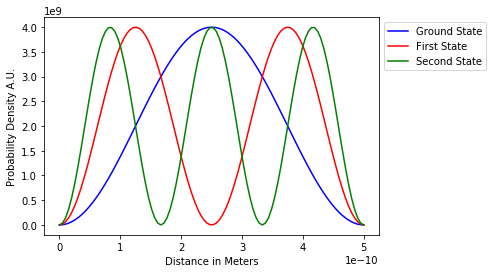

normalization of ground = 1.00000
normalization of first excited state = 1.00001
normalization of second excited state = 1.00003

Not sure why this is symmetric, I was expecting an asymmetry


In [32]:
'''
Newman Problem 6.9
Part E

Asymmetric Quantum Well
'''
import scipy.integrate as integrate
import numpy as np
from numpy.linalg import eigh
from math import pi
import matplotlib.pyplot as plt

# calculate hamiltonian matrix
N = 100
Hamiltonian = np.zeros((N, N), float)
for i in range(N):
    for j in range(N):
        Hamiltonian[i,j] = calculate_Hmn(i+1, j+1)

# store psi eigenstates
_, psi = eigh(Hamiltonian)

# sum eigenstates with appropriate weights (psi[m,n])
def calc_psi(n, x_list):
    wavefunction = sum(
        [psi[n,i]*np.sin(pi*(i+1)*x_list/L) for i in range(100)])
    return np.sqrt(2./L)*wavefunction

# generating wavefunctions
xs = np.linspace(0, L, 100)
ground = calc_psi(0,xs)
first = calc_psi(1,xs)
second = calc_psi(2,xs)

# plotting
plt.plot(xs, ground*ground,'-b', label='Ground State')
plt.plot(xs, first*first,'-r', label='First State')
plt.plot(xs, second*second,'-g', label='Second State')
plt.xlabel('Distance in Meters')
plt.ylabel('Probability Density A.U.')
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.show()

# checking normalization of wavefunctions
int_0 = integrate.simps(ground*ground, x = xs)
int_1 = integrate.simps(first*first, x = xs)
int_2 = integrate.simps(second*second, x = xs)
print(f'normalization of ground = {int_0:0.5f}')
print(f'normalization of first excited state = {int_1:0.5f}')
print(f'normalization of second excited state = {int_2:0.5f}\n')
print('Not sure why this is symmetric, I was expecting an asymmetry')

# Newman 6.12 <a id=problem12/>
### Part A
Demonstrate analytically that the solution of the two given equations
### Part B
Show that the equations can be rearranged and write a program to solve them using 
relaxation method. show that the method fails to converge
### Part C
Find a way to rearrange the equations such that the relaxation method converges to a solution.

In [148]:
'''
Newman Problem 6.12

Glycolysis
'''
from math import sqrt

def Part_B(x, y, a, b): 
    newx = lambda x, y: y*(a+x*x)
    newy = lambda x, y: b/(a+x*x)
    max_iterations = 1000
    current_iteration = 0
    while current_iteration < max_iterations:
        x, y = newx(x, y), newy(x, y)
        current_iteration += 1
    return x, y

def Part_C(x, y, a, b):
    # since x = b analytically, I just replaced a two x's with b's
    newx = lambda x, y: y*(a+b*x)
    newy = lambda x, y: b/(a+x*b)
    
    max_iterations = 1000
    current_iteration = 0
    while current_iteration < max_iterations:
        x, y = newx(x, y), newy(x, y)
        current_iteration += 1
    return x, y

x, y = Part_B(1, 1, 1, 2)
print('Part A')
print(f'x = {x:0.3f} and y = {y:0.3f}\n')

x, y = Part_C(1, 1, 1, 2)
print('Part B')
print(f'x = {x:0.3f} and y = {y:0.3f}')



Part A
x = 0.076 and y = 1.995

Part B
x = 2.000 and y = 0.400


# Newman 6.13 <a id='problem13'/>
### Part A 
Derive the nonlinear equation in the book:

$$
5e^{-x} + x - 5 = 0
$$
### Part B
Write a program to solve the equation with an $\epsilon = 10^{-6}$
### Part C
Using the constant found in part B, calculate the temperature at the surface of the sun
base on the peak emitted radiation at 502 nm

In [53]:
'''
Newman Problem 6.13

Wien's displacement Constant
'''
import numpy as np
from scipy.constants import physical_constants
from math import exp

h, _, _ = physical_constants['Planck constant']
k_b, _, _ = physical_constants['Boltzmann constant']
c, _, _ = physical_constants['speed of light in vacuum']

""" Part A ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"""

def binary_search(func, a, b):
    error = 1.
    x1 = a
    x2 = b
    while error > 1.e-6:
        # different signs
        if func(x1)*func(x2) < 0:
            xprime = .5*(x1 + x2)
            fprime = func(xprime)
            if fprime*func(x1) < 0:
                x2 = xprime
                continue
            elif fprime*func(x2) < 0:
                x1 = xprime
                continue   
        else:
            raise Exception('Binary search cannot detect zero in interval')
        error = abs(x2 - x1)
    return .5*(x1 + x2)


function = lambda x: 5*exp(-x) + x - 5

root = binary_search(function, 1, 10)
constant = h*c/(k_b*root)
print('Part B')
print(f"Wien's constant is {constant:0.5f}\n")

""" Part B ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"""

wavelength = 502*1.e-9
T = constant / wavelength
print('Part C')
print(f'The estimated surface temperature is: {T:0.1f} K')
print(f'Actual temperature of the sun is:     5778 K')


Part B
Wien's constant is 0.00290

Part C
The estimated surface temperature is: 5772.5 K
Actual temperature of the sun is:     5778 K


# Newman 6.16 <a id='problem16'/>
### Part A
show that the distance r from the center of Earth to the L1 point satisfies:

$$
\frac{GM}{r^2}  - \frac{Gm}{(R-r)^2} = \omega^2r
$$

### Part B
Write a program that uses either Newton's method or Secant method to solve for the distance r from the Earth to the L1 point. Compute to at least four significant digits.



In [22]:
'''
Newman Problem 6.16

The Lagrange Point
'''
from scipy.constants import physical_constants

G = 6.674*1.e-11
M = 5.974*1.e24
m = 7.348*1.e22
R = 3.844*1.e8
omega = 2.662*1.e-6

orbit = lambda r: (G*M/(r*r)-G*m/(R-r)**2-omega*omega*r)
orbit_prime = lambda r: (-2*G*M/(r**3)-2*G*m/(R-r)**3-omega*omega)

def newtons_method(func, derivative, guess):
    error = 1.
    x1 = guess
    while error > 1.e-9:
        xprime = x1 -func(x1)/derivative(x1)
        error = abs(xprime - x1)
        x1 = xprime
    return x1

L1 = newtons_method(orbit, orbit_prime, 1.e3)
print('Part A')
print(f'L1 is ~{L1:0.3E} m\n')




Part A
L1 is ~3.260E+08 m



# Newman 6.17 <a id='problem17'/>
### Part A
The kirchoff current law says that the total net current flowing into or out of every point in a circuit must be zero. Applying this equation to the junction at voltage $V_1$ in the circuit given, we obtain:

$$
\frac{V_1 - V_+}{R_1} + \frac{V_1}{R_2} + I_0[e^{(V_1 - V_2)/V_T} - 1] = 0
$$

Derive the corresponding expression for for voltage $V_2$

### Part B
Using Newton's method, solve the two nonlinear equations for the two voltages.

### Part C
Engineer's rule of thumb for diodes is that the voltage across a diode is always about 0.6 volts. Confirm this with your resu

In [33]:
"""
Newman Problem 6.17

Nonlinear Circuits
"""
import numpy as np
from numpy.linalg import solve

# constants
r1 = 1000
r2 = 4000
r3 = 3000
r4 = 2000
vplus = 5
vt = 0.05
Io = 3.e-9

# junction 1
def v1_junction(v1, v2):
    exp = Io*(np.exp((v1 - v2)/vt) - 1)
    fractions = (v1 - vplus)/r1 + v1/r2
    return fractions + exp

# junction 2
def v2_junction(v1, v2):
    exp = -Io*(np.exp((v1 - v2)/vt) - 1)
    fractions = (v2 - vplus)/r3 + v2/r4
    return fractions + exp

# jacobian entries
j00 = lambda x, y: (
    1/r1 + 1/r2 + Io*np.exp((x - y)/vt)/vt)
j01 = lambda x, y: (
    -Io*np.exp((x - y)/vt)/vt)
j10 = lambda x, y: (
    Io*np.exp((x - y)/vt)/vt)
j11 = lambda x, y: (
    1/r3 + 1/r4 - Io*np.exp((x - y)/vt)/vt)

def newtons_method(guess_v1, guess_v2):
    e = 1.
    v1, v2 = guess_v1, guess_v2
    while e > 1.e-4:
        # initialize matrix and vector
        jacobian = [[j00(v1, v2), j01(v1, v2)],
                    [j10(v1, v2), j11(v1, v2)]]
        v = [v1_junction(v1, v2), v2_junction(v1, v2)]
        
        print(np.linalg.det(jacobian))
        # solve linear equations and generate new v1 & v2
        delta_v  = solve(jacobian, v)
        v1prime, v2prime = np.array([v1, v2], float) - delta_v
        
        # calculate error & update v1, v2
        error = 0.5*(v1prime - v1 + v2prime - v2)
        v1, v2 = v1prime, v2prime
        
    return v1, v2

v1, v2 = newtons_method(1, 4)
print(f"Voltage 1 is {v1:0.4f}")
print(f"Voltage 2 is {v2:0.4f}")
        
        
        
        


1.0416666666666659e-06
-5846183.704807303
-1064235181.958429
0.0


LinAlgError: Singular matrix

# Newman 6.18 <a id='problem18'/>
### Part A
Write a function that takes a temperature as the argument and calculates the values of $\eta$ for the temperature from the formula given. Use your function to make a plot of $\eta$ as a function of temperature between 300 K and 10,000 K. You should see that there is an intermediate temperature where the efficiency is a maximum.
### Part B
Calculate the temperature for the maximum efficiency of the light bulb to within 1 K using the golden ratio search.
### Part C
Is it practical to run a tungsten filament  light bulb at the temperature found in part B?
Why/Why not?


Part A


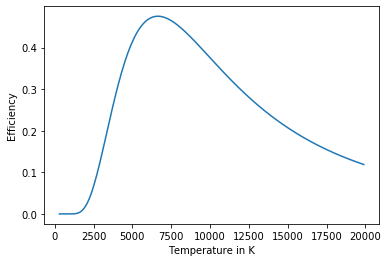

Part B
the maximum falls at  6909.83 K

Part C
Since the melting point of Tungsten is 3,695 K, 
this isn"t practical for obvious reasons


In [62]:
"""
Newman Problem 6.18

The temperature of a light bulb
"""
from scipy.constants import physical_constants
import scipy.integrate as intg
import numpy as np
import matplotlib.pyplot as plt


""" Part A ++++++++++++++++++++++++++++++++++++++++++++++++++++"""

# constants
k = physical_constants['Boltzmann constant'][0]
c = physical_constants['speed of light in vacuum'][0]
h = physical_constants['Planck constant'][0]

# function to be integrated
integrand = lambda x: x*x*x/(np.exp(x) - 1)

def calc_efficiency(T):
    # limits of visible spectrum
    lower_visible = 400.e-9
    upper_visible = 800.e-9
    
    # limits of integration
    lower = h*c/(upper_visible*k*T)
    upper = h*c/(lower_visible*k*T)
    
    # integration
    integral = intg.quad(integrand, lower, upper)[0]
    return 15./np.pi**4*integral

Ts = [T for T in range(300, 20000, 100)]
Es = [calc_efficiency(T) for T in Ts]

print('Part A')
plt.plot(Ts, Es)
plt.xlabel('Temperature in K')
plt.ylabel('Efficiency')
plt.show()

""" Part B ++++++++++++++++++++++++++++++++++++++++++++++++++++"""

# golden ratio & accuracy
z = (1+np.sqrt(5))/2.
accuracy = 1.e-6

# initial guesses
x1 = 5000.
x4 = x1*2
x2 = x4 - (x4 - x1)/z
x3 = x1 - (x4 - x1)/z

# value of function at four points
f1 = -1* calc_efficiency(x1)
f2 = -1* calc_efficiency(x2)
f3 = -1* calc_efficiency(x3)
f4 = -1* calc_efficiency(x4)

while (x4 - x1) > accuracy:
    if f2 < f3:
        x4, f4 = x3, f3
        x3, f3 = x2, f2
        x2 = x1 + (x4 - x1)/z
        f2 = calc_efficiency(x2)
    else:
        x1, f1 = x2, f2
        x2, f2 = x3, f3
        x3 = x1 + (x4 - x1)/z
        f3 = calc_efficiency(x3)

        
print('Part B')
print(f"the maximum falls at {x1 + x4: 0.2f} K\n")

print('Part C')
print('Since the melting point of Tungsten is 3,695 K, \nthis isn"t practical for obvious reasons')
    
